<a href="https://colab.research.google.com/github/Aldirhezaldi/PCVK_Genap_2021/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Akses folder images pada Google Drive anda dengan kode berikut :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ikuti alur autorisasinya hingga muncul pesan:"*Mounted at /content/drive*

2. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:
            g(x,y ) = f(x,y ) +b 

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:

**Transformasi Linear Brightness**

Formula: g(x,y)=f(x,y)+b
g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


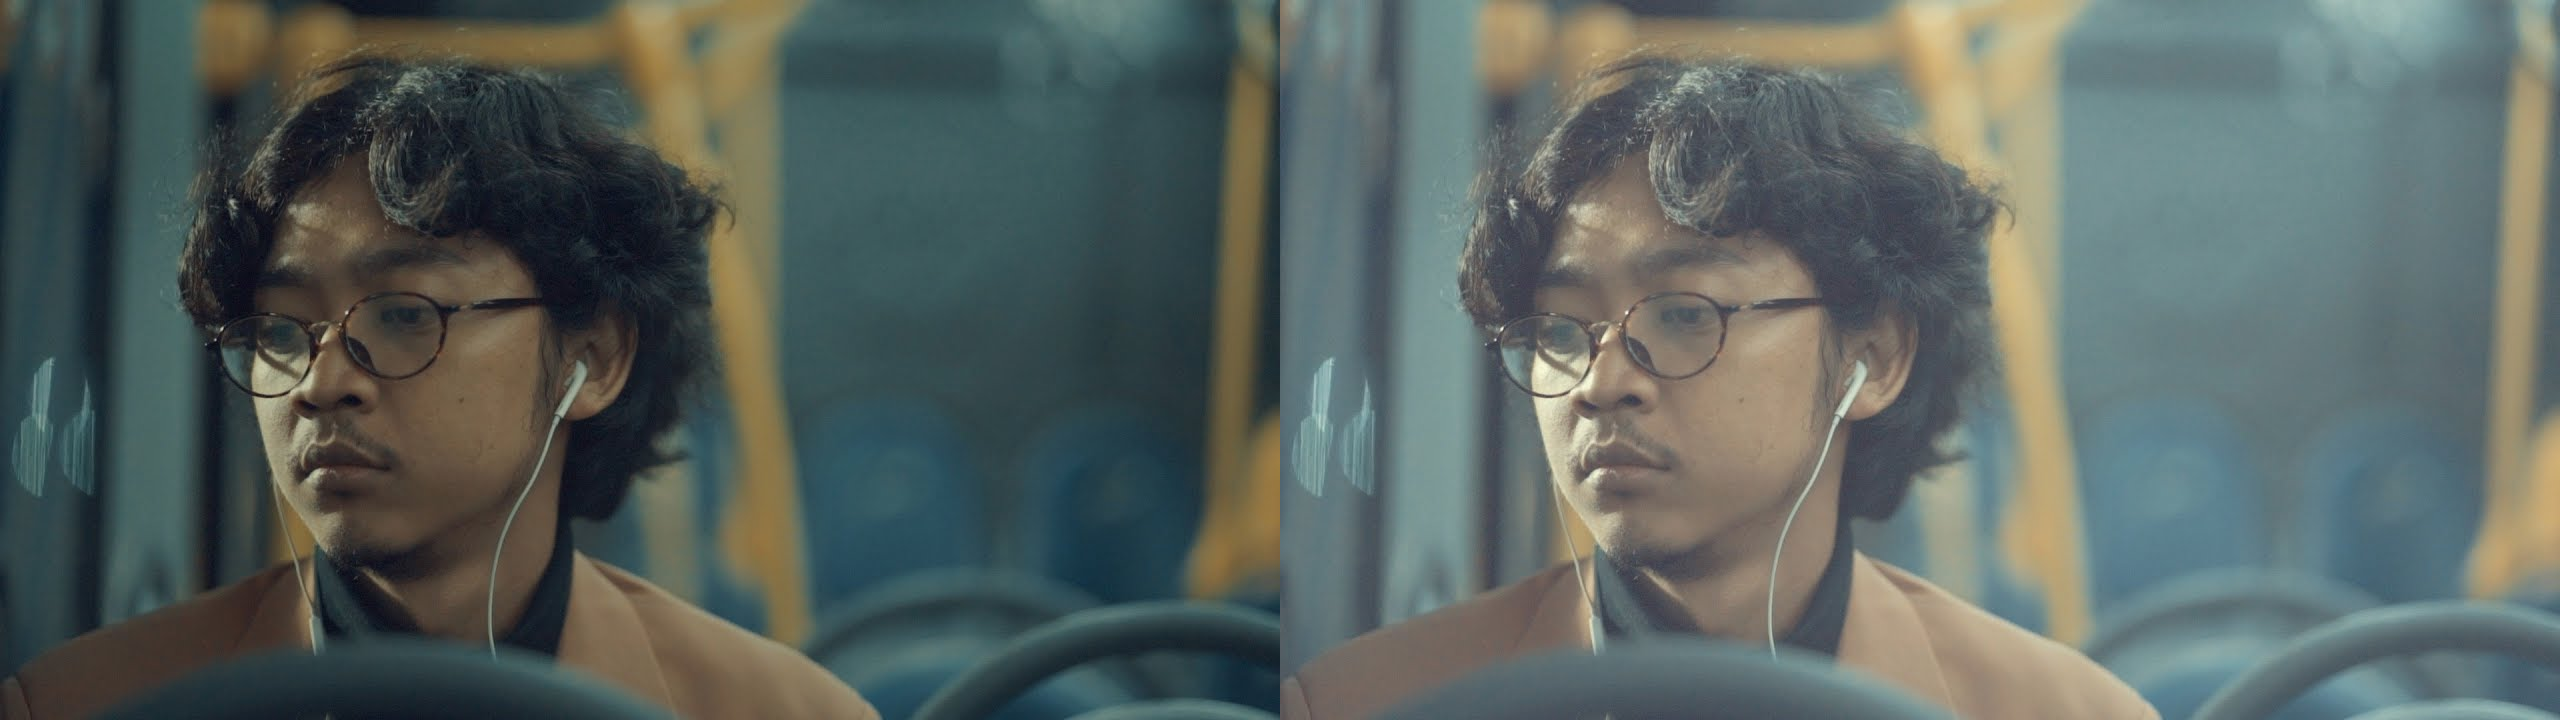

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/image/maxresdefault.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Dari potongan kode di atas dapat dilihat bahwa ketika dijalankan, system akan menampilkan text
field untuk memasukkan konstanta nilai brightness yang diinginkan, dan akan disimpan pada
variabel brightness. Kemudian ditentukan citra pada drive yang akan diolah dan ditampung di
variabel original. Tahap selanjutnya adalah mengakses pixel citra masukan dengan 3 perulangan.
Perulangan pertama dilakukan pada shape[0] untuk tinggi citra, perulangan kedua dilakukan pada
shape[1] untuk lebar citra, dan perulangan ketiga dilakukan pada shape[2] yang merupakan
channel warna pada citra. Setelah melakukan 3 perulangan, dilakukan transformasi linier
brightness dengan cara menambahkan nilai brightness pada citra masukan. Contoh hasil dari
kode program di atas adalah sebagai berikut.

**TUGAS PRAKTIKUM**

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran
seperti berikut:

 mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukan Tingkat Kecerahan [-255 -255]: 60
Masukan Kontras [1.0 - 3.0] : 1.5


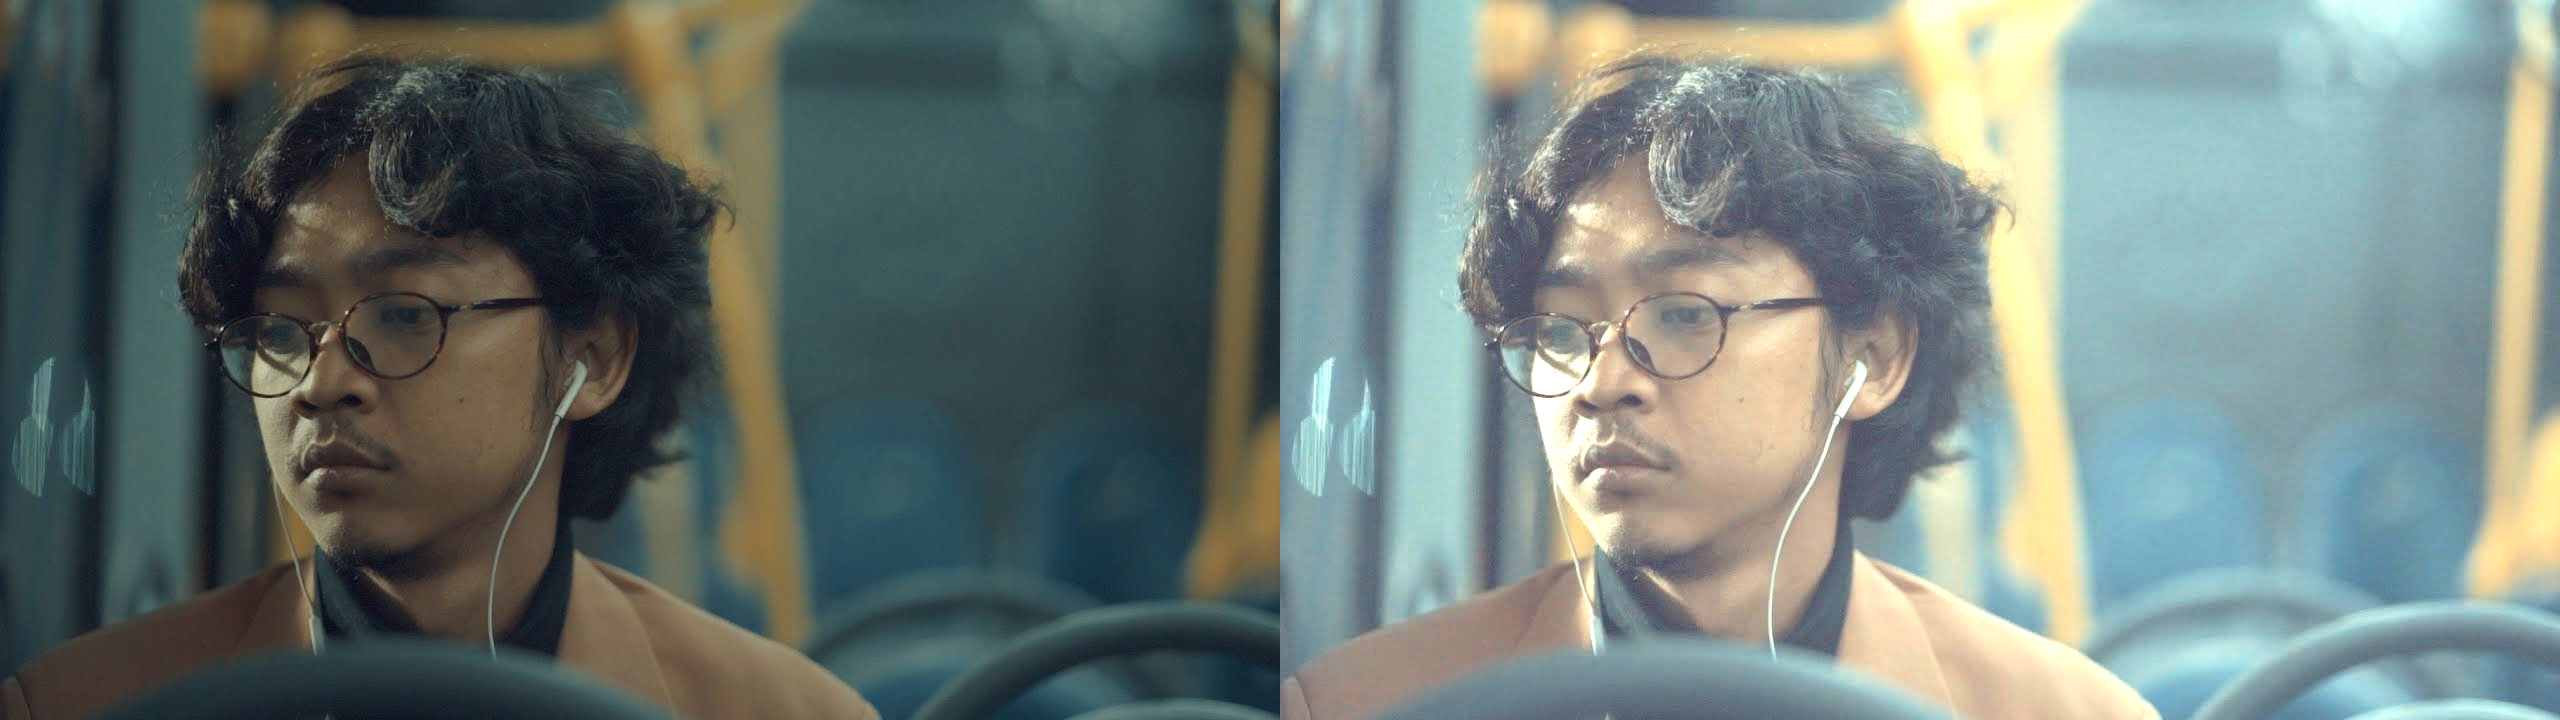

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
print(' mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan Tingkat Kecerahan [-255 -255]: '))
  contrast = float(input('Masukan Kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/image/maxresdefault.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga
menghasilkan keluaran seperti berikut:

 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Masukan nilai kecerahan: 40


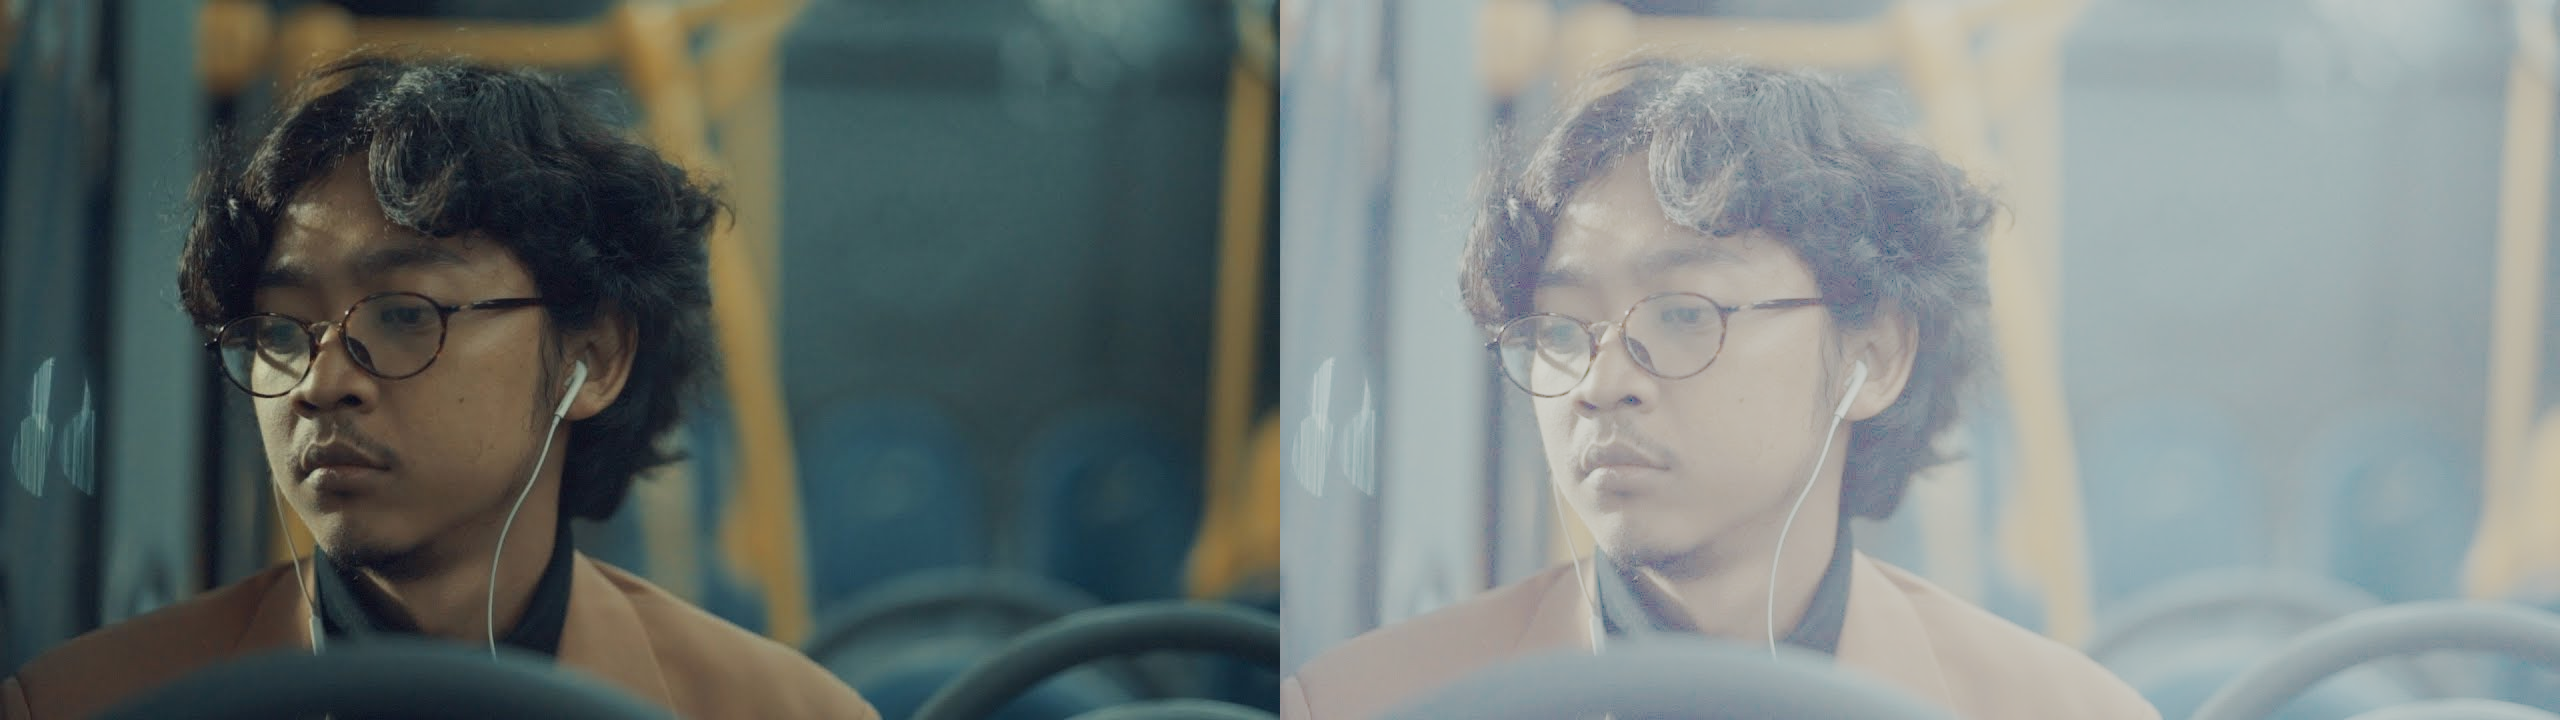

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/image/maxresdefault.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

# Apply log transformation method 
#c = 255 / np.log(1 + np.max(brightness_image)) 
#log_image = c * (np.log(brightness_image + 1)) 
#log_image = np.array(brightness_image, dtype = np.uint8)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

        a. Averaging

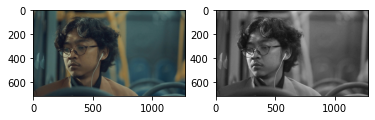

In [10]:
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/image/maxresdefault.jpg')
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

pam = np.mean(img2, axis=2)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(pam, cmap="gray")

        b. Lightness

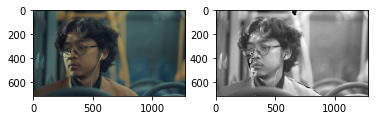

In [13]:
img = cv.imread('/content/drive/MyDrive/image/maxresdefault.jpg')
color_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R, G, B = color_img[:,:,0], color_img[:,:,1],color_img[:,:,2]
max = np.maximum(np.maximum(R,G),B)
min = np.minimum(np.minimum(R,G),B)

gray_img = 0.5 * (max + min)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

        c. Luminance

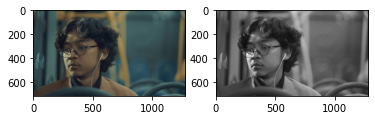

In [14]:
img = cv.imread('/content/drive/MyDrive/image/maxresdefault.jpg')
color_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R, G, B = color_img[:,:,0], color_img[:,:,1],color_img[:,:,2]
gray_img = (0.2126 * R)+(0.7152 * G)+(0.0722 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')


4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna
merah menjadi grayscale seperti pada contoh berikut:


# Bagian Baru